
# Project: Investigate a Dataset - [TMDb movie data]

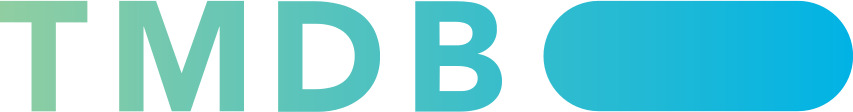


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.\
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.\
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.\
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
**Question #1:** What is the most popular gener and what is the most profitable ?!

**Question #2:** Who is the actor that made the largest numbers of movies?

**Question #3:** Which production companies made the highest profit over the years?

**Question #4:** Is there any relation between revenue and vote count ?

**Question #5:** Is there any relation between Budget and Revenue?

**Question #6:** Movies have the Highest Renenue over the years?

In [1]:
#loading necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### Reading Data


In [2]:
# loading data
df=pd.read_csv('tmdb-movies.csv')

### Inspecting Dimentions

In [3]:
df.shape

(10866, 21)

Our TMdb dataset has 10866 rows and 21 columns.

### View first rows of data & inspecting data types

In [4]:
# view head of the data
pd.set_option('display.max_columns',200)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
# inspecting data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### View if there any missing data or dublicates

In [6]:
# check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check for duplicated values
df.duplicated().sum()

1


### Data Cleaning


In [8]:
# list of columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### 1. Drop unnecessary columns in our analysis

In [9]:
df_mod=df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1)
df_mod.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### 2. Fill missing values

In [10]:
# fill the null values with 'unknown'
df_mod.fillna('unknown', inplace=True)
df_mod.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### 3. Drop Duplicated Rows

In [11]:
df_mod.drop_duplicates(inplace = True)
df_mod.duplicated().sum()

0

### 4. Drop Rows with (revenue_adj, budget_adj, runtime) = 0

In [12]:
zero_data = df_mod[(df_mod.revenue_adj == 0)|(df_mod.budget_adj == 0)|(df_mod.runtime == 0)]
df_mod.drop(zero_data.index,inplace=True)

### 5. Add Profit column to our data

In this analysis we will use 'budget_adj' & 'revenue_adj' for calculations

In [13]:
df_mod['profit']= df_mod['revenue_adj'] - df_mod['budget_adj']
df_mod.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


In [14]:
# view some summary statistics about our data
df_mod.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.940715e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis



###  Question #1: What is the most popular gener and what is the most profitable ?!

every movie has multiple genere, we need to split this column and then explode!

In [15]:
# separate ('genre') columns by '|'
df1=df_mod.assign(genres=df_mod.genres.str.split('|')).explode('genres')
df1.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08


This will increase the number of rows dramatically, but i think it the best course of action to apply group by to genre column.

In [16]:
df_geners_popularity=df1.groupby('genres' , as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_geners_popularity


,genres,popularity
9,Foreign,0.179608
16,TV Movie,0.273628
5,Documentary,0.294458
11,Horror,0.854005
12,Music,0.899005
14,Romance,0.954889
10,History,0.970674
6,Drama,1.001411
3,Comedy,1.012321
4,Crime,1.123961


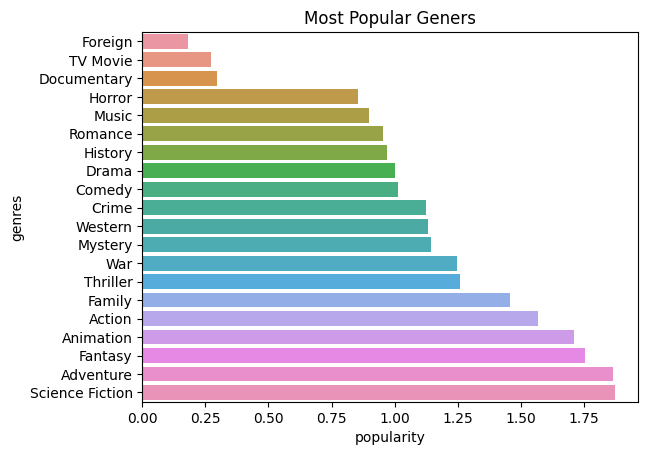

In [17]:
sns.barplot(data=df_geners_popularity, x='popularity', y='genres').set(title='Most Popular Geners');

Let's invest what is the most profitable genre !

In [18]:
df_geners_profit=df1.groupby(['genres'], as_index=False)['profit'].mean().sort_values(by=['profit'])
df_geners_profit


,genres,profit
9,Foreign,-1.644639e+05
5,Documentary,1.942646e+07
16,TV Movie,5.143802e+07
11,Horror,5.816584e+07
10,History,6.478188e+07
6,Drama,6.666600e+07
19,Western,6.848370e+07
4,Crime,7.048507e+07
13,Mystery,7.125838e+07
14,Romance,7.961554e+07


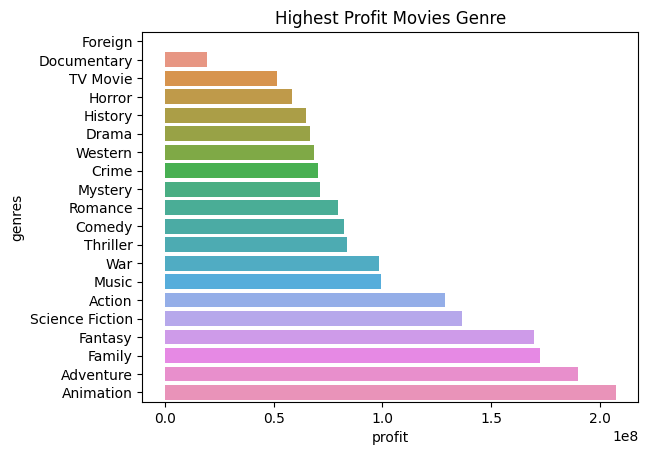

In [19]:
sns.barplot(data=df_geners_profit, x='profit', y='genres').set(title='Highest Profit Movies Genre');

### Question  #2:  Who is the actor that made the largest numbers of movies?

every movie has multiple cast, we need to split this column and then explode!

In [20]:
# separate ('cast') column by '|'
df2=df_mod.assign(cast=df_mod.cast.str.split('|')).explode('cast')
df2.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09


                       cast
Robert De Niro           52
Bruce Willis             46
Samuel L. Jackson        44
Nicolas Cage             43
Matt Damon               36
Johnny Depp              35
Tom Hanks                34
Morgan Freeman           34
Sylvester Stallone       34
Brad Pitt                34
Harrison Ford            34
Tom Cruise               33
Eddie Murphy             32
Denzel Washington        32
Liam Neeson              31
Julianne Moore           30
Owen Wilson              30
Robin Williams           29
Arnold Schwarzenegger    29
Mark Wahlberg            29


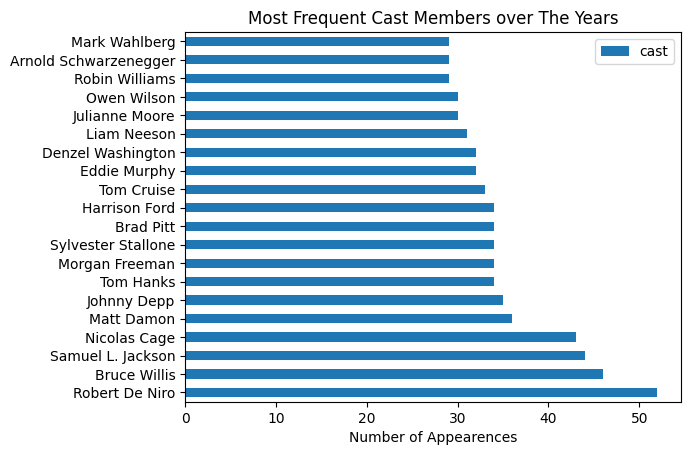

In [21]:
# view top 20 freq cast member with bar plot
top_cast=df2.cast.value_counts().to_frame().iloc[0:20, :]
print(top_cast)
top_cast.plot(kind='barh');
plt.xlabel("Number of Appearences") 
plt.title("Most Frequent Cast Members over The Years"); #add the title for the chart

### Question  #3:  Which production companies made the highest profit over the years?

some movies have multiple production company, we need to split this column and then explode!

In [22]:
# separate ('production_companies') column by '|'
df3=df_mod.assign(production_companies=df_mod.production_companies.str.split('|')).explode('production_companies')
df3.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09


In [23]:
df_prod_comp=df3.groupby('production_companies', as_index=False)['profit'].mean().sort_values(by=['profit'], ascending=False)
df_prod_comp

,production_companies,profit
1341,Hoya Productions,2.128036e+09
2995,Truenorth Productions,1.718723e+09
107,Alfran Productions,1.246626e+09
206,Argyle Enterprises,1.072786e+09
1537,Julia Phillips and Michael Phillips Productions,1.021009e+09
...,...,...
1718,Lolita Productions,-8.278450e+07
2555,Screenland Pictures,-9.518961e+07
376,Blind Wink Productions,-1.551102e+08
2625,Silver Bullet Productions (II),-1.551102e+08


production_companies    Hoya Productions
profit                     2128035624.37
Name: 1341, dtype: object


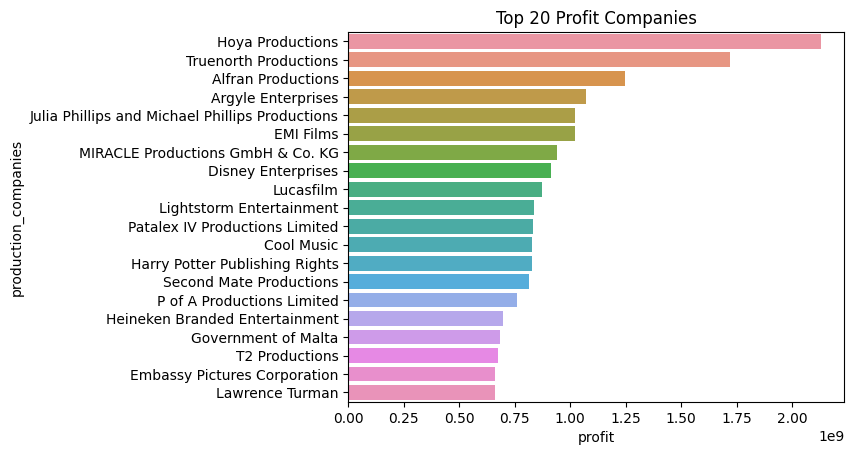

In [24]:
# view top 20 company with a bar plot
top_20=df_prod_comp.iloc[0:20, :]
sns.barplot(data=top_20, x='profit', y='production_companies').set(title='Top 20 Profit Companies');
print(df_prod_comp.iloc[0, :])

### Question  #4:  Is there any relation between revenue and vote count ?

We can check this by making a scatter plot between revenue and popularity

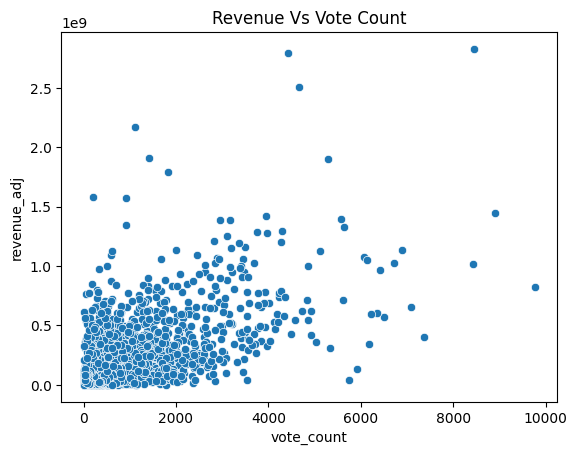

In [25]:
# use seaborn to make scatter plot
sns.scatterplot(data=df_mod, x='vote_count', y='revenue_adj').set(title='Revenue Vs Vote Count');

It seems that there is a positive correlation between vote counts and revenue, High vote counts movies tend to make higher revenue

### Question  #5:  Is there any relation between Budget and Revenue ?

We can check this by making a scatter plot between budget and revenue

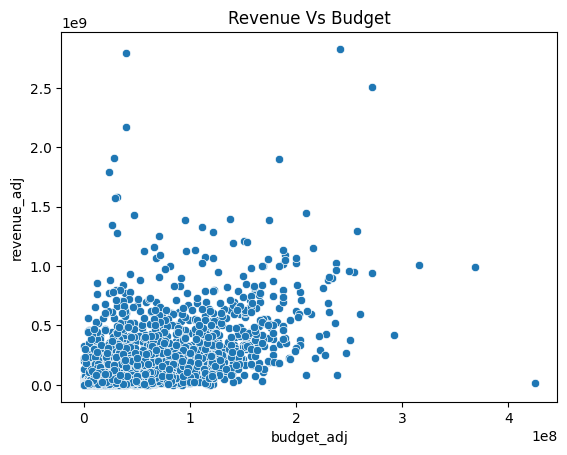

In [26]:
# use seaborn to make scatter plot
sns.scatterplot(data=df_mod, x='budget_adj', y='revenue_adj').set(title='Revenue Vs Budget');

It seems that there is a positive correlation between budget and revenue, High budget movies tend to make higher revenue

### Question  #6:  Movies have the Highest Renenue over the years?

original_title          Avatar
revenue_adj       2827123750.0
Name: 1386, dtype: object


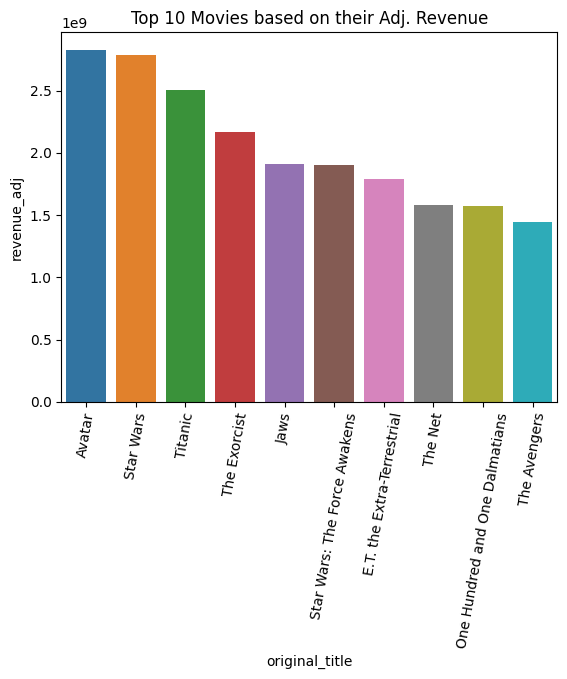

In [27]:
# extract movie title and adjusted revenue from df_mod dataframe
movies_and_revenue = df_mod[["original_title", "revenue_adj"]]
movies_and_revenue= movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).iloc[0:10, :]
print(movies_and_revenue.iloc[0, :])
plot=sns.barplot(data= movies_and_revenue , x='original_title', y='revenue_adj').set(title='Top 10 Movies based on their Adj. Revenue')
plt.xticks(rotation=80);

<a id='conclusions'></a>

## Conclusions

#### Question #1: What is the most popular gener and what is the most profitable ?! 
The most popular gener is Science Fiction with popularity value 1.873294 and the most profitable genre is Animation with profit about 207485229.35$ (adjusted).

#### Question #2: Who is the actor that made the largest numbers of movies?
The actor that made the largest numbers of movies is Robert De Niro with 52 movies .

#### Question #3: Which production companies made the highest profit over the years?
The company which make the highest pfofit over the years is Hoya Productions with profit about 2128035624.37$ (adjusted).

#### Question #4: Is there any relation between revenue and vote count ?
It seems that there is a positive correlation between vote counts and revenue, High vote counts movies tend to make higher revenue.

#### Question #5: Is there any relation between Budget and Revenue?
It seems that there is a positive correlation between budget and revenue, High budget movies tend to make higher revenue.

#### Question #6: Movies have the Highest Renenue over the years?
The highest revenue movie is Avatar that has about 2827123750$ (Adj. Revenue)


### Data Limitations
Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :

1. Most of the data columns are irrelevant for the analysis

2. many NaN values are missing from our dataset for an uncertain reason (We should try a better web scrapping for a better data quality or prepare data from a different source).

3. most of the remaining data are 0-valued treated as missing, so the data after cleaning is pretty insufficient.

4. The data is outdated it may be good to draw some conclusions if we had better data quality, but a lot of changes has occured in the past couple of years that made a huge impact on the Cinema industry such as the streaming services such as Netflix, HBO or Disney plus or the recent global pandemic. 


In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1